In [43]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State
import matplotlib.pyplot as plt
import numpy as np

Ready reading maze file ../data/toy_maze.txt
10 runs of 20 episodes completed on model without proper learning.


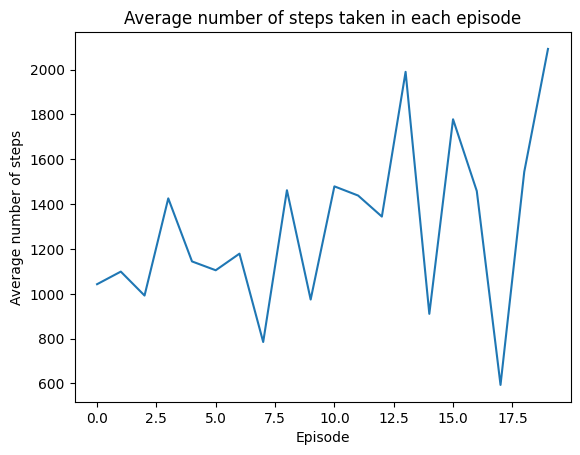

In [44]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)
num_runs = 10
epsilon = 0.1
num_episodes = 20
run_steps = [[] for _ in range(num_episodes)]

# Run the agent for num_runs
for run in range(num_runs):
    robot = Agent(0, 0)
    selection = MyEGreedy()
    learn = MyQLearning()
    stop = False

    # Run the agent for num_episodes
    for episode in range(num_episodes):
        step_number = 0
        # keep learning until you decide to stop or reach 30000 steps
        while not stop and step_number < 30000:
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            learn.set_q(robot.get_state(maze), action, maze.get_reward(robot.do_action(action, maze)))
            # Robot is done
            if robot.get_state(maze) == State(9,9,1):
                stop = True
                robot.reset()
            step_number += 1

        if step_number >= 30000:
            print("Stopped at 30000 steps")
        else:
            run_steps[episode].append(step_number)
        stop = False
print(f"{run + 1} runs of {episode + 1} episodes completed on model without proper learning.")

# PLOT GRAPH
run_steps = [np.mean(x) for x in run_steps]
plt.plot(run_steps)
plt.xlabel("Episode")
plt.ylabel("Average number of steps")
plt.title("Average number of steps taken in each episode")
plt.show()

Now let's implement the update_q() and run.

In [39]:
def complete_run(maze, run_steps, num_episodes, epsilon, learning_rate = 0.7):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)
    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()
    # Make a Qlearning object
    learn = MyQLearning()
    stop = False
    # Run the agent for num_episodes
    for episode in range(num_episodes):
        step_number = 0
        # keep learning until you decide to stop or reach 30000 steps
        while not stop and step_number < 30000 :
            if step_number == 1 and episode == 0:
                step_number += 1
                continue
            state = robot.get_state(maze)
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            state_next = robot.do_action(action, maze)
            reward = maze.get_reward(state_next)
            possible_actions = maze.get_valid_actions(state_next)
            learn.update_q(state, action, reward, state_next, possible_actions, alfa=learning_rate, gamma=0.9)
            # The robot is done
            if state_next == State(9,9,1):
                stop = True
                robot.reset()
            step_number += 1
        if step_number >= 30000:
            print("Stopped at 30000 steps")
        else:
            run_steps[episode].append(step_number)
        stop = False
        robot.reset()

Ready reading maze file ../data/toy_maze.txt
10 runs of 20 episodes completed on model with proper learning.


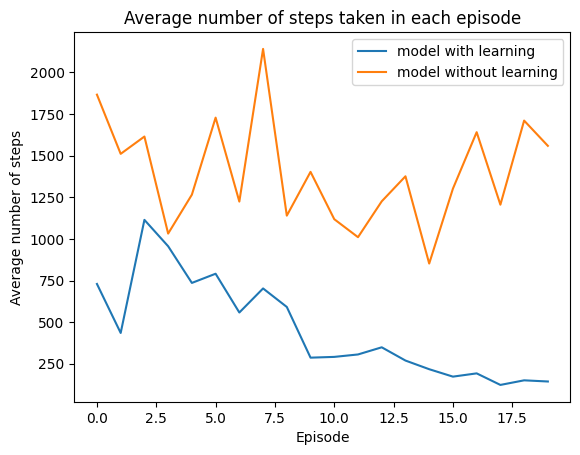

In [40]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)

num_runs = 10
epsilon = 0.1
num_episodes = 20
# Keep track of steps taken in each episode for each run
run_steps2 = [[] for _ in range(num_episodes)]

# Run the agent for num_runs
for run in range(num_runs):
    complete_run(maze, run_steps2, num_episodes, epsilon)
print(f"{run + 1} runs of {num_episodes} episodes completed on model with proper learning.")
run_steps2 = [np.mean(x) for x in run_steps2]

# PLOT GRAPH COMPARING THE MODEL WITH AND WITHOUT LEARNING
plt.plot(run_steps2, label='model with learning')
plt.plot(run_steps, label='model without learning')
plt.xlabel("Episode")
plt.ylabel("Average number of steps")
plt.title("Average number of steps taken in each episode")
plt.legend()
plt.show()

<h2>Change in average number of steps per episode as a result of change in epsilon value</h2>
This part is to examine the change in average number of steps per episode as a result of change in epsilon value. Epsilon range is 0.1 - 1, iterated by 0.1 increments.

In [5]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.set_reward(maze.get_state(9, 9), 10)

stopping_condition = 30000
num_runs = 10
num_episodes = 40
epsilonResults = []
for val in range(10):
    # 0.1, 0.2, 0.3
    epsilon = 0.1 + (val / 10)
    run_steps = [[] for _ in range(num_episodes)]
    for run in range(num_runs):
        complete_run(maze, run_steps, num_episodes, epsilon)
    run_steps = [np.mean(x) for x in run_steps]
    epsilonResults.append(run_steps)
print("Process completed")

Ready reading maze file ../data/toy_maze.txt
Process completed


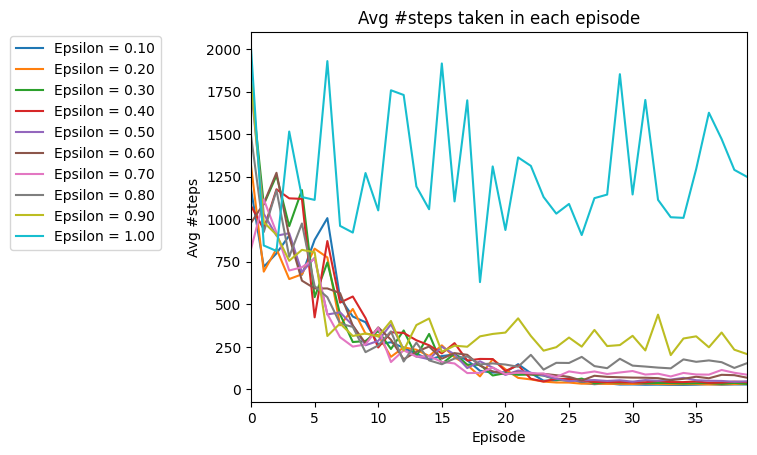

In [31]:
for i in range(len(epsilonResults)):
    eps_val = "{:.2f}".format(round((0.1 + (i / 10)), 2))
    desc = f"Epsilon = {eps_val}"
    plt.plot(epsilonResults[i], label=desc)
plt.xlabel("Episode")
plt.ylabel("Avg #steps")
plt.title("Avg #steps taken in each episode")
plt.xlim(0,39)
plt.legend(loc='center left', bbox_to_anchor=(-0.5, 0.7))
plt.show()

It's obvious that with increasing Epsilon, the graph gets farther from a decrease and a convergence. Values above 0.7 seem to be out of conversation. Let's look at the convergence on the graph for those below. 

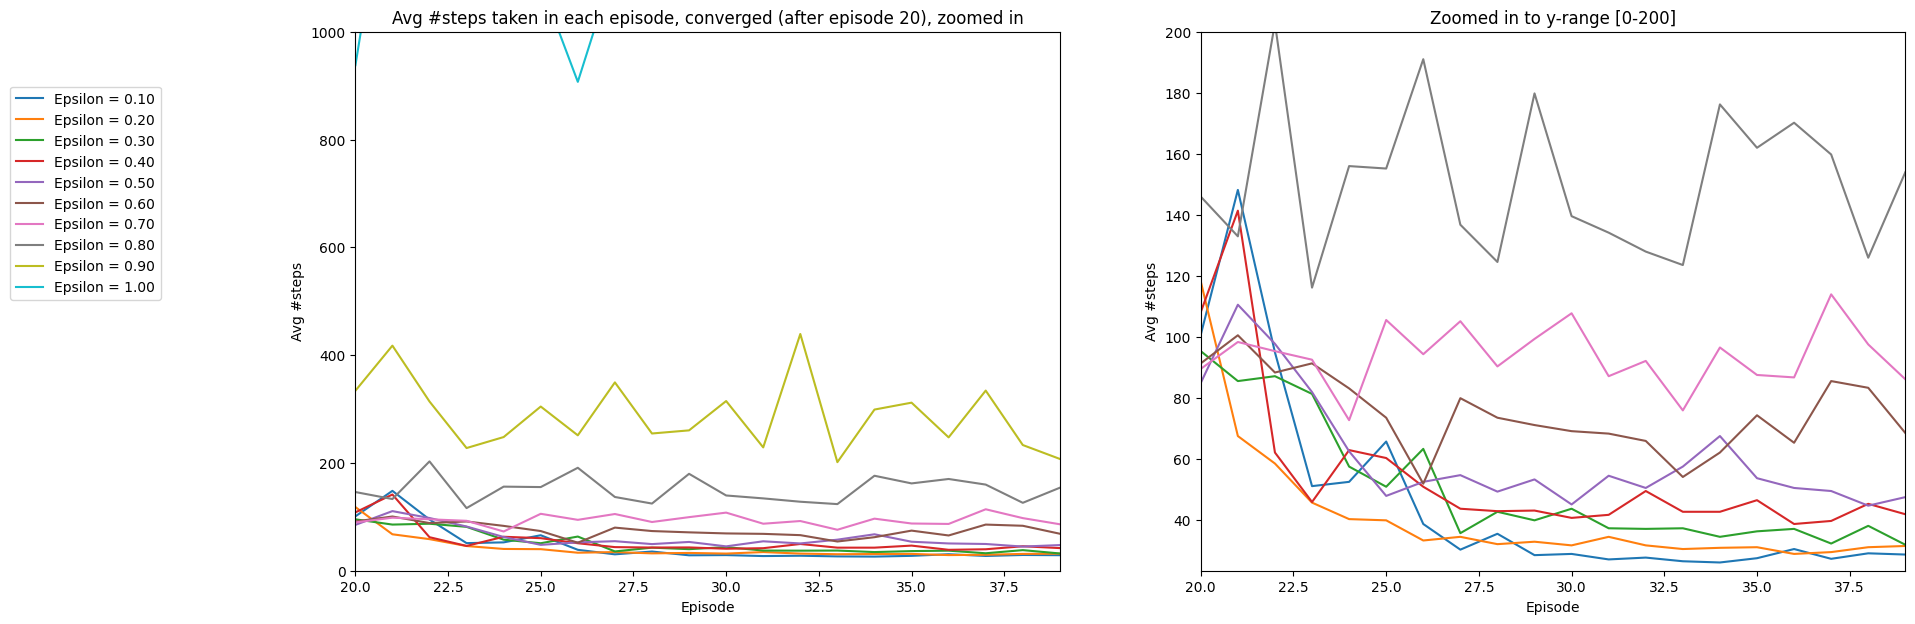

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
for i in range(len(epsilonResults)):
    eps_val = "{:.2f}".format(round((0.1 + (i / 10)), 2))
    desc = f"Epsilon = {eps_val}"
    ax1.plot(epsilonResults[i], label=desc)
    ax2.plot(epsilonResults[i], label=desc)

ax1.set_xlabel("Episode")
ax1.set_ylabel("Avg #steps")
ax1.set_title("Avg #steps taken in each episode, converged (after episode 20), zoomed in")
ax1.set_xlim(20, 39)
ax1.set_ylim(0, 1000)

ax2.set_xlabel("Episode")
ax2.set_ylabel("Avg #steps")
ax2.set_title("Zoomed in to y-range [0-200]")
ax2.set_xlim(20, 39)
ax2.set_ylim(23.5, 200)

ax1.legend(loc='center left', bbox_to_anchor=(-0.5, 0.7))
plt.show()

From the graphing above, it's evident that lower the epsilon value, better the outcome. Since an improvement is displayed as the value decreases towards 0.1, a further exploration will be made to see if any decrease from 0.1 on will also be better.

<h3>Let's also take a look at the range 0.01 - 0.1</h3>

In [17]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)

stopping_condition = 30000
num_runs = 10
num_episodes = 40
epsilonResults2 = []
for val in range(10):
    # 0.1, 0.2, 0.3
    epsilon = 0.01 + (val / 100)
    run_steps = [[] for _ in range(num_episodes)]
    for run in range(num_runs):
        complete_run(maze, run_steps, num_episodes, epsilon)
    run_steps = [np.mean(x) for x in run_steps]
    epsilonResults2.append(run_steps)
print("Process completed")

Ready reading maze file ../data/toy_maze.txt
Process completed


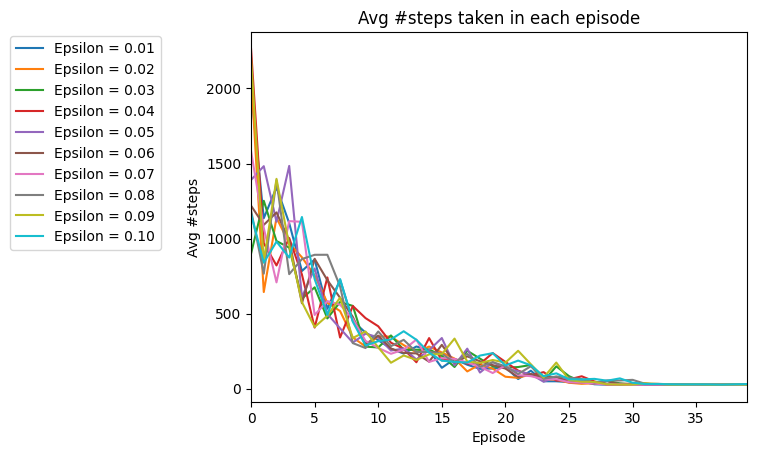

In [25]:
for i in range(len(epsilonResults2)):
    eps_val = "{:.2f}".format(round((0.01 + (i / 100)), 2))
    desc = f"Epsilon = {eps_val}"
    plt.plot(epsilonResults2[i], label=desc)
    
plt.xlabel("Episode")
plt.ylabel("Avg #steps")
plt.title("Avg #steps taken in each episode")
plt.xlim(0, 39)
plt.legend(loc='center left', bbox_to_anchor=(-0.5, 0.7))
plt.show()

This already seems better than previous graph. Let's look a bit more in depth.

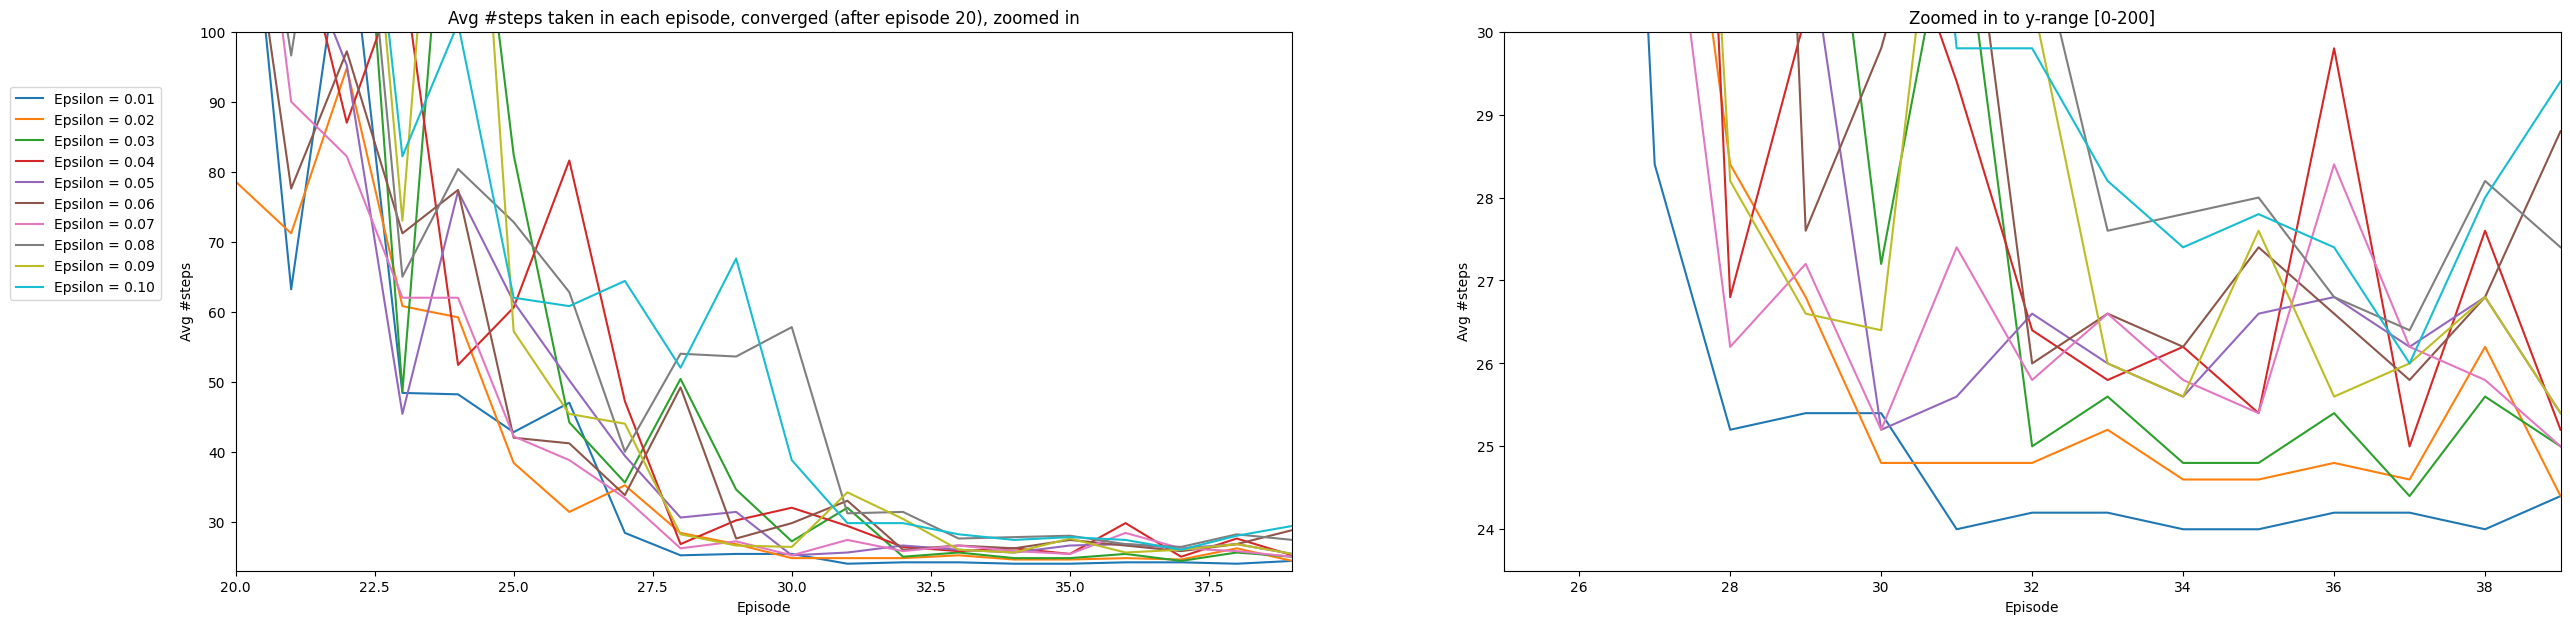

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30, 7))
for i in range(len(epsilonResults2)):
    eps_val = "{:.2f}".format(round((0.01 + (i / 100)), 2))
    desc = f"Epsilon = {eps_val}"
    ax1.plot(epsilonResults2[i], label=desc)
    ax2.plot(epsilonResults2[i], label=desc)

ax1.set_xlabel("Episode")
ax1.set_ylabel("Avg #steps")
ax1.set_title("Avg #steps taken in each episode, converged (after episode 20), zoomed in")
ax1.set_xlim(20, 39)
ax1.set_ylim(23, 100)

ax2.set_xlabel("Episode")
ax2.set_ylabel("Avg #steps")
ax2.set_title("Zoomed in to y-range [0-200]")
ax2.set_xlim(25, 39)
ax2.set_ylim(23.5, 30)

ax1.legend(loc='center left', bbox_to_anchor=(-0.22, 0.7))
plt.show()

Appears so that higher values converge to a higher horizontal level whereas lower the value lower the y-value the graph converges to. 
<h4>The exploration has revealed 0.01 to be the most optimal value for EPSILON.</h4>

<h2>Change in average number of steps per episode as a result of change in learning rate</h2>
This part is to examine the change in average number of steps per episode as a result of change in alpha value. Alpha range is 0.1 - 1, iterated by 0.1 increments.

In [21]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.set_reward(maze.get_state(9, 9), 10)

stopping_condition = 30000
num_runs = 10
num_episodes = 40
alpha_results = []
epsilon = 0.01
minimum_alpha = 0
value_of_minimum_alpha = 999999999999999999999999
for val in range(10):
    # 0.1, 0.2, 0.3
    alpha = 0.1 + (val / 10)
    run_steps = [[] for _ in range(num_episodes)]
    for run in range(num_runs):
        complete_run(maze, run_steps, num_episodes, epsilon, alpha)
    run_steps = [np.mean(x) for x in run_steps]
    alpha_results.append(run_steps)
    if np.min(run_steps) < value_of_minimum_alpha:
        value_of_minimum_alpha = np.min(run_steps)
        minimum_alpha = alpha
    print(f"Process at: {(val+1) * 10}%", end='\r', flush=True)
print("Process completed")

Ready reading maze file ../data/toy_maze.txt
Process completed


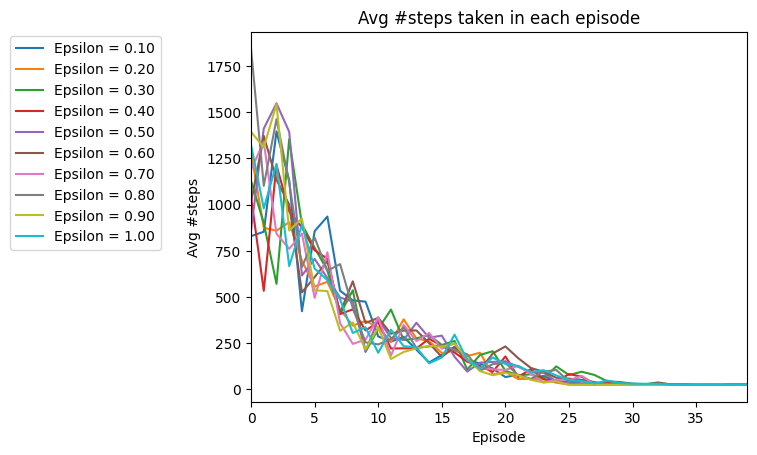

The most optimal value for alpha is  0.2


In [22]:
for i in range(len(alpha_results)):
    eps_val = "{:.2f}".format(round((0.1 + (i / 10)), 2))
    desc = f"Epsilon = {eps_val}"
    plt.plot(alpha_results[i], label=desc)
plt.xlabel("Episode")
plt.ylabel("Avg #steps")
plt.title("Avg #steps taken in each episode")
plt.xlim(0,39)
plt.legend(loc='center left', bbox_to_anchor=(-0.5, 0.7))
plt.show()

print("The most optimal value for alpha is ", minimum_alpha)

In [149]:
# Load the maze
import math


file = "../data/toy_maze.txt"
maze = Maze(file)
# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)
maze.set_reward(maze.get_state(9, 0), 5)
num_runs = 1
start_epsilon = 1
final_epsilon = 0.1

num_episodes = 50
gg=0.1
decay_rate = 0.01 # the decay rate to reduce epsilon
rewards = []
run_steps = [[] for _ in range(num_episodes)]

# Run the agent for num_runs
for run in range(num_runs):
    robot = Agent(0, 0)
    selection = MyEGreedy()
    learn = MyQLearning()
    stop = False

    # Run the agent for num_episodes
    epsilon = start_epsilon
    for episode in range(num_episodes):
        step_number = 0
        gg *= gg
        if(epsilon > final_epsilon):
            epsilon -= decay_rate 
        # keep learning until you decide to stop or reach 30000 steps
        while not stop and step_number < 30000 :
            if step_number == 1 and episode == 0:
                step_number += 1
                continue
            state = robot.get_state(maze)
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            state_next = robot.do_action(action, maze)
            reward = maze.get_reward(state_next)
            possible_actions = maze.get_valid_actions(state_next)
            learn.update_q(state, action, reward, state_next, possible_actions, alfa=0.7, gamma=0.7)
            # The robot is done
            if state_next == maze.get_state(9,9):
                stop = True
                rewards.append(10)
                print("normal")
                robot.reset()

            if state_next == maze.get_state(9,0):
                stop = True
                rewards.append(5)
                print("corner")
                robot.reset()

            step_number += 1

        if step_number >= 30000:
            print("Stopped at 30000 steps")
        else:
            run_steps[episode].append(step_number)
        stop = False
        

Ready reading maze file ../data/toy_maze.txt
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
normal
corner
normal
corner
corner
corner
corner
corner
corner
corner
corner
corner
normal
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner
corner


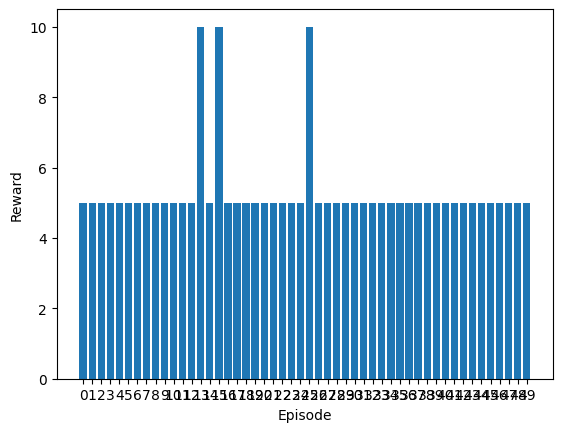

In [150]:
episodes = range(len(rewards)) # generate episodes as a sequence of integers

plt.bar(episodes, rewards) # create a bar graph of rewards against the episode numbers
plt.xlabel('Episode') # set the x-axis label
plt.ylabel('Reward') # set the y-axis label
plt.xticks(episodes) # set the x-axis ticks to the episode numbers
plt.show()